In [8]:
# Import Libraries
import os
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

In [ ]:
# Ananlysis of job titles in Norway and trend over months of the year 2023
df_no = df[df['job_country'] == 'Norway'].copy()
df_no['job_posted_month'] = df_no['job_posted_date'].dt.strftime('%B')
df_NO_pivot = df_no.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_NO_pivot.reset_index(inplace=True)
df_NO_pivot['month_no'] = pd.to_datetime(df_NO_pivot['job_posted_month'], format='%B').dt.month
df_NO_pivot.sort_values(by='month_no', inplace=True)
df_NO_pivot.set_index('job_posted_month', inplace=True)
df_NO_pivot.drop(columns='month_no', inplace=True)

df_NO_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,16.0,5.0,20.0,57.0,60.0,6.0,5.0,16.0,14.0,21.0
February,18.0,11.0,27.0,39.0,33.0,1.0,7.0,15.0,14.0,22.0
March,12.0,6.0,16.0,38.0,31.0,6.0,4.0,4.0,4.0,22.0
April,22.0,7.0,17.0,43.0,24.0,5.0,2.0,4.0,6.0,18.0
May,10.0,2.0,23.0,35.0,31.0,1.0,5.0,6.0,5.0,6.0
June,22.0,2.0,15.0,44.0,23.0,4.0,1.0,10.0,9.0,15.0
July,12.0,1.0,19.0,28.0,13.0,2.0,NaN,10.0,3.0,6.0
August,26.0,19.0,19.0,31.0,45.0,6.0,8.0,8.0,10.0,35.0
September,11.0,3.0,16.0,31.0,21.0,2.0,1.0,6.0,2.0,7.0


In [27]:
data = {
    "job_posted_month": [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ],
    "Front-End-Developer": [10450, 9830, 10500, 9742, 9360, 10247, 11555, 11253, 10480, 10346, 9841, 9944],
    "Back-End-Developer": [12600, 11520, 13065, 12258, 11555, 12363, 13700, 13468, 12610, 12590, 11540, 12057],
    "Full-Stack-Developer": [10030, 9828, 10350, 10232, 10031, 9929, 10838, 10636, 10434, 10333, 9727, 10030],
    "UI/UX Designer": [10250, 9800, 10300, 10227, 9920, 10280, 11135, 10932, 10529, 10266, 10024, 9821]
}



df_jobs = pd.DataFrame(data)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)  # Prevent line breaks

# print(df_jobs)
df_jobs.to_csv('/home/gurotech/code/data-python/data_analytics/2_Advance/jobs_data.csv', index=False)

In [36]:
df_jobs_data_NO = pd.read_csv('/home/gurotech/code/data-python/data_analytics/2_Advance/jobs_data.csv', index_col='job_posted_month')

print(df_jobs_data_NO)

                  Front-End-Developer  Back-End-Developer  Full-Stack-Developer  UI/UX Designer
job_posted_month                                                                               
January                         10450               12600                 10030           10250
February                         9830               11520                  9828            9800
March                           10500               13065                 10350           10300
April                            9742               12258                 10232           10227
May                              9360               11555                 10031            9920
June                            10247               12363                  9929           10280
July                            11555               13700                 10838           11135
August                          11253               13468                 10636           10932
September                       10480   

In [39]:
# Merging DataFrames for Data Analysis and Sofware
df_NO_merged = df_NO_pivot.merge(df_jobs_data_NO, on='job_posted_month')

In [47]:
top_5 = (
  df_NO_merged
  .sum()
  .sort_values(ascending=False)
  .head()
  .index # Get the index of the top 5
  .to_list()
  )
top_5

['Back-End-Developer',
 'Front-End-Developer',
 'UI/UX Designer',
 'Full-Stack-Developer',
 'Data Engineer']

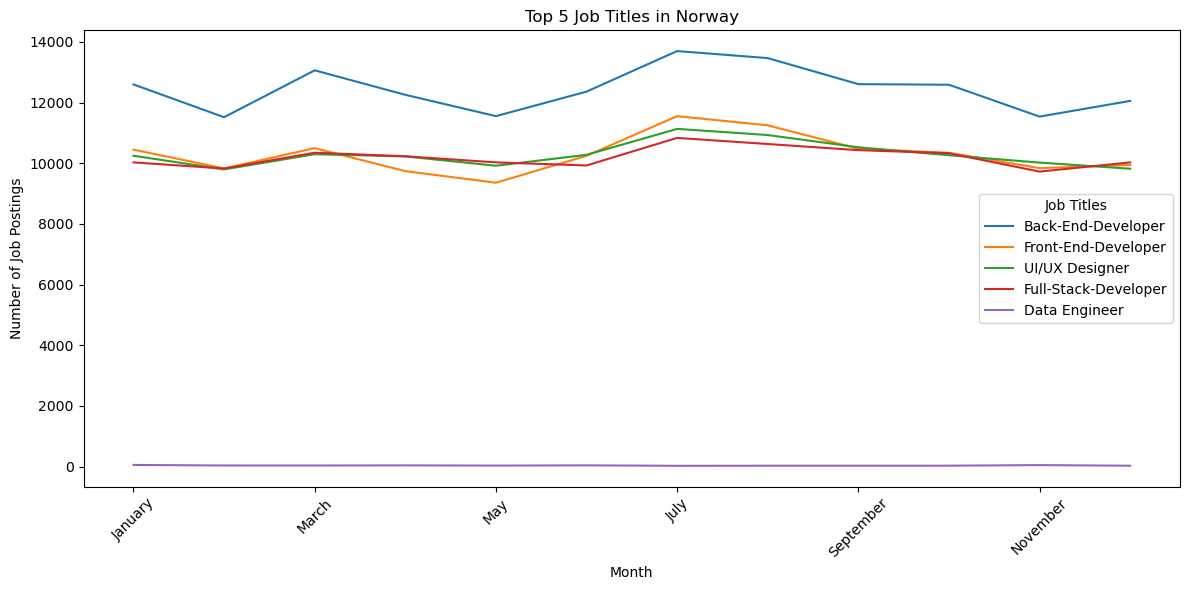

In [ ]:
df_NO_merged[top_5].plot(kind='line', figsize=(12, 6), title='Top 5 Job Titles in Norway')
plt.xlabel('Year 2023 - Job Posted Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend(title='Job Titles')
plt.tight_layout()
plt.savefig('/home/gurotech/code/data-python/data_analytics/2_Advance/top_5_job_titles_norway.png')
plt.show()
